## Objective

* Build a predictive model that answers what sorts of people were more likely to survive

## Imports

In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [168]:
traindf = pd.read_csv(r'D:\Projetos Python\Data-Projects\titanic_train.csv')
test_df_id = pd.read_csv(r'D:\Projetos Python\Data-Projects\titanic_test.csv')

## Train

In [133]:
traindf.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [134]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [135]:
for column in traindf.columns:

    emb = traindf[column].value_counts()
    display(emb)

#traindf.columns

PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64

Survived
0    549
1    342
Name: count, dtype: int64

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64

Sex
male      577
female    314
Name: count, dtype: int64

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

### Excluding columns useless for the model

In [136]:
traindf = traindf.drop(['PassengerId', 'Ticket', 'Fare', 'Cabin'],axis=1)

traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 55.8+ KB


### Null values filling 

In [137]:
traindf['Embarked'] = traindf['Embarked'].ffill()

traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 55.8+ KB


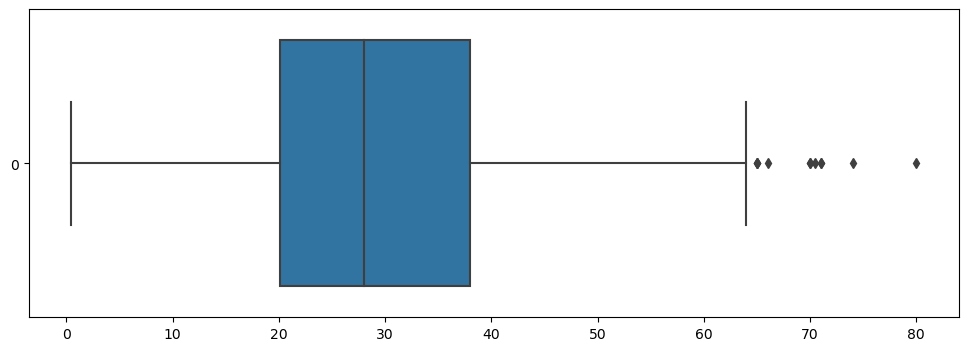

In [138]:
plt.figure(figsize=(12,4))

fig = sns.boxplot(traindf['Age'], orient='h')

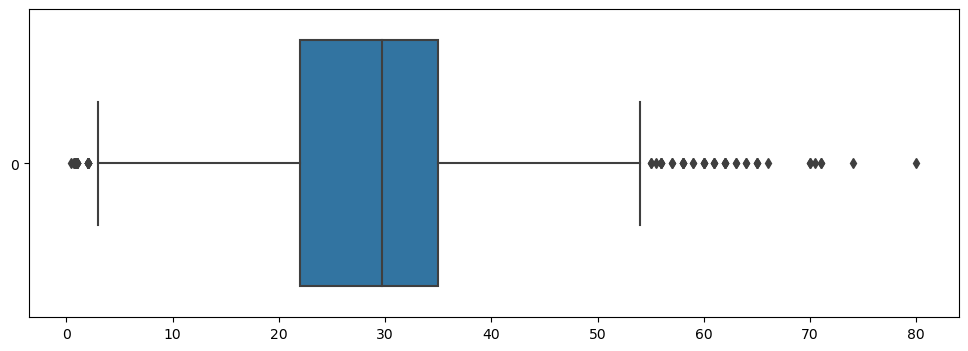

In [139]:
traindf['Age'] = traindf['Age'].fillna(traindf['Age'].mean())

plt.figure(figsize=(12,4))

fig = sns.boxplot(traindf['Age'], orient='h')

In [140]:
traindf_dummies = pd.get_dummies(data=traindf, columns=['Sex', 'Embarked'], dtype=int)
display(traindf_dummies)

,Survived,Pclass,Name,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,0,1,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,1,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,1,0,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,1,0,0,0,1
4,0,3,"Allen, Mr. William Henry",35.000000,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",27.000000,0,0,0,1,0,0,1
887,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,1,0,0,0,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,1,0,0,0,1
889,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,0,1,1,0,0


<Axes: >

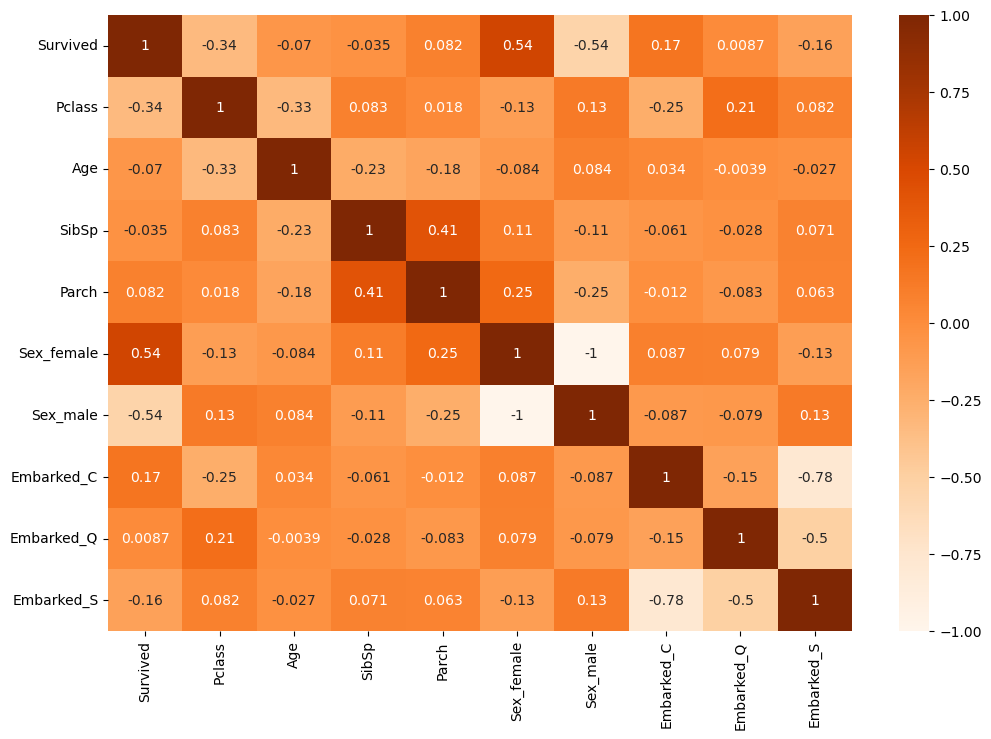

In [141]:
plt.figure(figsize=(12,8))
sns.heatmap(traindf_dummies.corr(numeric_only=True),annot=True, cmap = 'Oranges')

In [142]:
suv_df = pd.DataFrame(traindf[['Sex', 'Survived']].value_counts().groupby(['Survived','Sex']).sum()).reset_index()
print("--" * 15)
print(" " * 9, "Sex Counts")
print("--" * 15)
display(suv_df)

#for line in range(len(suv_df)):

suv_norm= pd.DataFrame(traindf[['Sex', 'Survived']].groupby('Sex', as_index=False).mean())
print("--" * 15)
print(" " * 7, "Survival Rate")
print("--" * 15)
display(suv_norm)
                      
# ax = sns.barplot(suv_df, x='Sex', y='count', hue='Survived')
# ax.bar_label(ax.containers[0])
# ax.bar_label(ax.containers[1])

------------------------------
          Sex Counts
------------------------------


,Survived,Sex,count
0,0,female,81
1,0,male,468
2,1,female,233
3,1,male,109


------------------------------
        Survival Rate
------------------------------


,Sex,Survived
0,female,0.742038
1,male,0.188908


d:\Anaconda\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


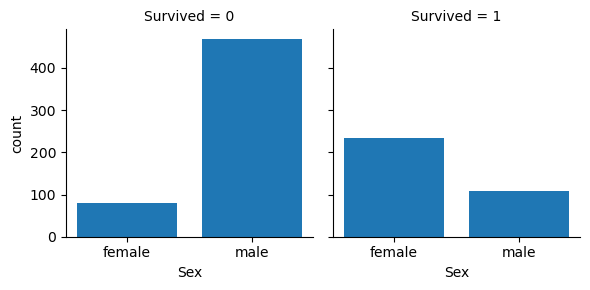

In [143]:
g = sns.FacetGrid(suv_df, col='Survived')
g.map(plt.bar,'Sex', 'count')


d:\Anaconda\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


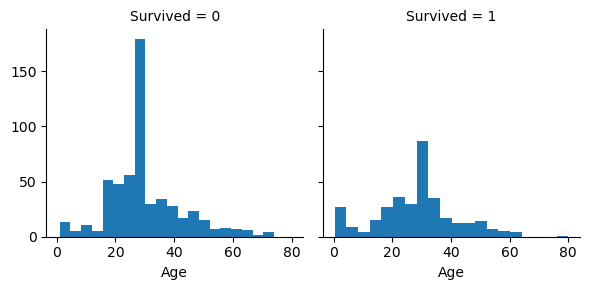

In [144]:
g = sns.FacetGrid(traindf, col='Survived')
g.map(plt.hist, 'Age', bins=20)

------------------------------
         Pclass Counts
------------------------------


,Survived,Pclass,Sex,count
0,0,1,female,3
1,0,1,male,77
2,0,2,female,6
3,0,2,male,91
4,0,3,female,72
5,0,3,male,300
6,1,1,female,91
7,1,1,male,45
8,1,2,female,70
9,1,2,male,17


------------------------------
     Pclass Survival Rate
------------------------------


,Pclass,Sex,Survived
0,1,female,0.968085
1,1,male,0.368852
2,2,female,0.921053
3,2,male,0.157407
4,3,female,0.500000
5,3,male,0.135447


d:\Anaconda\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


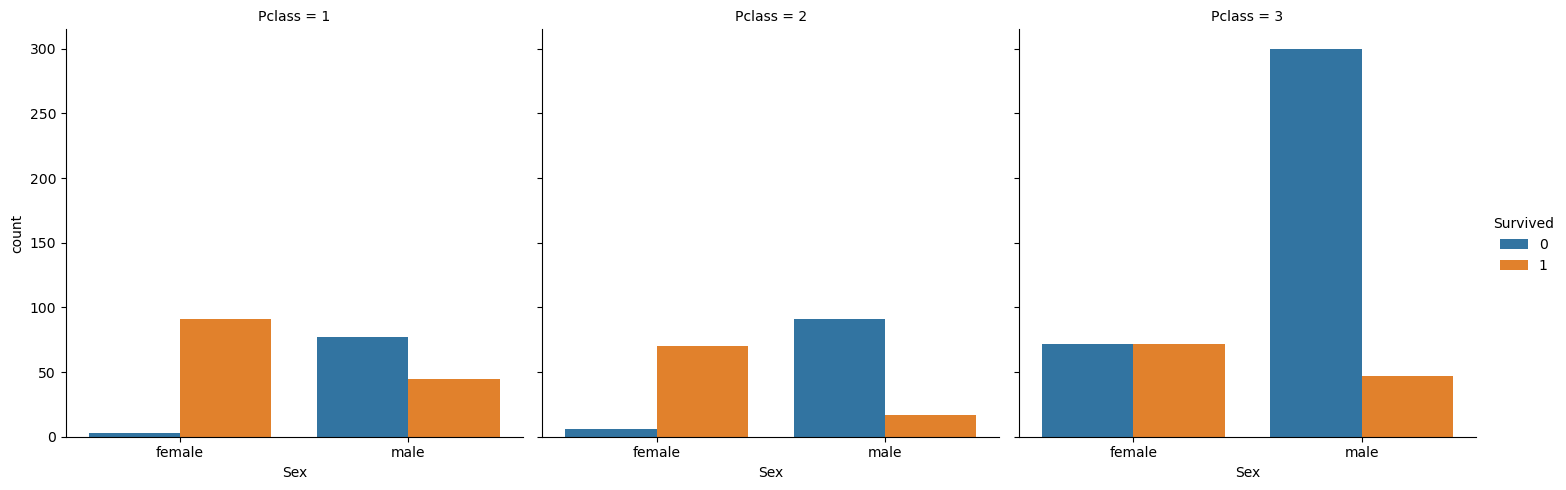

In [145]:
pclass_df = pd.DataFrame(traindf[['Pclass', 'Survived', 'Sex']].value_counts().groupby(['Survived','Pclass', 'Sex']).sum()).reset_index()
print("--" * 15)
print(" " * 8, "Pclass Counts")
print("--" * 15)
display(pclass_df)

pclass_norm= pd.DataFrame(traindf[['Sex', 'Survived', 'Pclass']].groupby(['Pclass', 'Sex'], as_index=False).mean())
print("--" * 15)
print(" " * 4, "Pclass Survival Rate")
print("--" * 15)
display(pclass_norm)

ax = sns.catplot(
    pclass_df, kind='bar',
    x='Sex', y='count', hue='Survived', col='Pclass', errorbar=None)

## Model

In [146]:
X = traindf_dummies.drop(columns=['Name','Survived'],axis=1)
y = traindf_dummies['Survived']

print("--" * 25)
print(f'   Shapes of X={X.shape} y={y.shape}, #Survived={y.sum()}')
print("--" * 25)

--------------------------------------------------
   Shapes of X=(891, 9) y=(891,), #Survived=342
--------------------------------------------------


In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score


mod = RandomForestClassifier()
mod.fit(X,y).predict(X).sum()  #318 Surviviors has been predicted from the data

316

In [148]:
mod = RandomForestClassifier(class_weight= {0:1, 1:2})
mod.fit(X,y).predict(X).sum()  #332 Surviviors has been predicted with params weight adjustment

334

In [149]:
#Given that I predict a Survivior how accurate am I?
print(precision_score(y, mod.predict(X)))

#did I get all Surviviors cases?
print(recall_score(y, mod.predict(X)))

0.9281437125748503
0.9064327485380117


## Optmizing params

In [150]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
    estimator = RandomForestClassifier(),
    param_grid = {'class_weight':[{0:1,1:v} for v in range (1,4)]},
    cv = 4,
    n_jobs=-1
)

grid.fit(X,y)

GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}]})

In [151]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.256243,0.040832,0.015505,0.002871,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.757848,0.829596,0.789238,0.788288,0.791242,0.025490,1
1,0.208547,0.008791,0.017254,0.001640,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.748879,0.825112,0.780269,0.756757,0.777754,0.029681,2
2,0.253026,0.046513,0.016471,0.000887,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.744395,0.816143,0.780269,0.761261,0.775517,0.026669,3


In [152]:
from sklearn.metrics import make_scorer

grid = GridSearchCV(
    estimator = RandomForestClassifier(n_estimators= 2000),
    param_grid = {'class_weight':[{0:1,1:v} for v in range (1,4)]},
    scoring={'precision': make_scorer(precision_score), 'recall': make_scorer(recall_score)},
    refit='precision',
    cv = 5,
    n_jobs=-1,
    return_train_score= True
)

grid.fit(X,y)


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=2000),
             n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}]},
             refit='precision', return_train_score=True,
             scoring={'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

In [153]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,mean_test_recall,std_test_recall,rank_test_recall,split0_train_recall,split1_train_recall,split2_train_recall,split3_train_recall,split4_train_recall,mean_train_recall,std_train_recall
0,4.578626,0.497964,0.248256,0.018262,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.666667,0.774194,0.782609,0.814815,...,0.725064,0.066511,3,0.890110,0.905109,0.890511,0.879562,0.875458,0.888150,0.010314
1,4.332971,0.247470,0.272861,0.016342,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.661972,0.750000,0.771429,0.810345,...,0.739685,0.058905,2,0.930403,0.927007,0.919708,0.905109,0.901099,0.916665,0.011669
2,3.590219,0.890583,0.212848,0.041667,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.661972,0.700000,0.760563,0.770492,...,0.742626,0.057494,1,0.930403,0.945255,0.930657,0.927007,0.923077,0.931280,0.007510


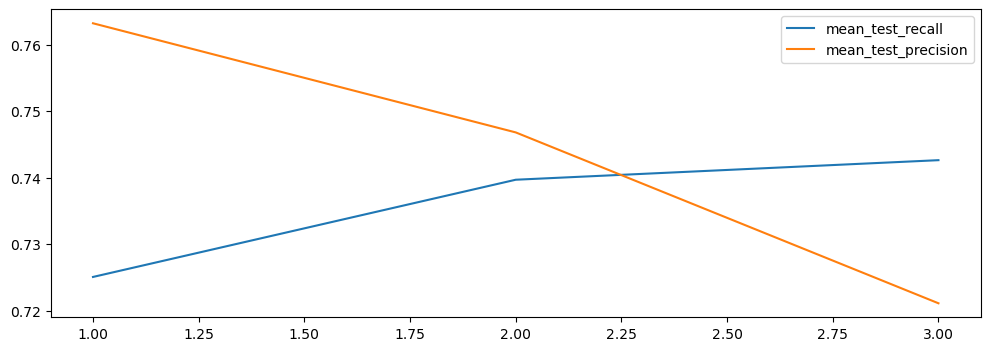

In [154]:
plt.figure(figsize=(12,4))
df = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall', 'mean_test_precision']:
    plt.plot([_[1] for _ in df['param_class_weight']],
             df[score],
             label=score)
plt.legend()

In [155]:
grid.predict(X).sum()

320

In [156]:
#Given that I predict a Survivior how accurate am I?
print(precision_score(y, grid.predict(X)))

#did I get all Surviviors cases?
print(recall_score(y, grid.predict(X)))

0.946875
0.8859649122807017


## Test dataset

In [169]:
test_df_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [ ]:
for column in test_df_id.columns:

    emb = test_df_id[column].value_counts()
    display(emb)

In [171]:
test_df = test_df_id.drop(['PassengerId', 'Ticket', 'Fare', 'Cabin'],axis=1)

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Embarked  418 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 23.0+ KB


In [172]:
test_df['Age'] = test_df['Age'].fillna(traindf['Age'].mean())

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Embarked  418 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 23.0+ KB


In [173]:
test_df_encoded = pd.get_dummies(data=test_df, columns=['Sex', 'Embarked'], )

display(test_df_encoded)

,Pclass,Name,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,"Kelly, Mr. James",34.500000,0,0,False,True,False,True,False
1,3,"Wilkes, Mrs. James (Ellen Needs)",47.000000,1,0,True,False,False,False,True
2,2,"Myles, Mr. Thomas Francis",62.000000,0,0,False,True,False,True,False
3,3,"Wirz, Mr. Albert",27.000000,0,0,False,True,False,False,True
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.000000,1,1,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",29.699118,0,0,False,True,False,False,True
414,1,"Oliva y Ocana, Dona. Fermina",39.000000,0,0,True,False,True,False,False
415,3,"Saether, Mr. Simon Sivertsen",38.500000,0,0,False,True,False,False,True
416,3,"Ware, Mr. Frederick",29.699118,0,0,False,True,False,False,True


In [176]:
X_test = test_df_encoded.drop('Name', axis=1)
predictions = grid.predict(X_test)

#display(predictions)

output = pd.DataFrame({'PassengerId':test_df_id['PassengerId'], 'Survived': predictions})
display(output)
output.to_csv('submission.csv', index=False)
print("Submission successfully saved!")



,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Submission successfully saved!
